In [24]:
pip install pandas numpy matplotlib seaborn scikit-learn 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# **1. Import Library**

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [26]:
bank_df = pd.read_csv("./Dataset_inisiasi.csv")
print("Dataset")
bank_df.head()

Dataset


,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Marital_Status_Married,Marital_Status_Single,Attrition_Flag_Existing Customer,KMeans_Cluster
0,0.504929,0.404255,0.6,0.604651,0.8,0.166667,0.500000,0.292811,0.308701,0.296481,0.324698,0.042123,0.248062,0.28783,0.061061,1.0,1.0,0.0,1.0,2
1,0.920398,0.489362,1.0,0.720930,1.0,0.166667,0.333333,0.187402,0.343266,0.193997,0.324698,0.042534,0.178295,0.28783,0.105105,0.0,0.0,1.0,1.0,0
2,0.049060,0.531915,0.6,0.534884,0.6,0.166667,0.166667,0.058127,0.000000,0.094354,0.324698,0.073818,0.139535,0.28783,0.000000,1.0,1.0,0.0,1.0,1
3,0.514130,0.297872,0.8,0.488372,0.4,0.666667,0.166667,0.055128,1.000000,0.022717,0.324698,0.042123,0.139535,0.28783,0.760761,0.0,1.0,0.0,1.0,1
4,0.008517,0.297872,0.6,0.209302,0.8,0.166667,0.166667,0.094483,0.000000,0.128004,0.324698,0.042123,0.139535,0.28783,0.000000,1.0,1.0,0.0,1.0,1


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [28]:
# Memisahkan fitur dan target
X = bank_df.drop(columns=["Attrition_Flag_Existing Customer", "CLIENTNUM"])
y = bank_df["Attrition_Flag_Existing Customer"]

# Menyertakan KMeans_Cluster sebagai fitur tambahan
X["KMeans_Cluster"] = bank_df["KMeans_Cluster"]

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Verifikasi bentuk data
print("Data Training:")
print(f"X: {X_train.shape}, y: {y_train.shape} ")
print("\nData Testing:")
print(f"X: {X_test.shape}, y: {y_test.shape}")

Data Training:
X: (8101, 18), y: (8101,) 

Data Testing:
X: (2026, 18), y: (2026,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [40]:
# Inisialisasi model
models = {
    "Random Forest": RandomForestClassifier(random_state=42, n_jobs=-1),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

In [41]:
# Melatih model
trained_models = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model
    print(f" {name} telah dilatih.")

 Random Forest telah dilatih.
 Logistic Regression telah dilatih.
 K-Nearest Neighbors telah dilatih.
 Decision Tree telah dilatih.


Dalam kode ini menggunakan empat algoritma Machine Learning untuk klasifikasi yakni:
1. Random Forest
   - Merupakan metode ensemble berbasis Decision Tree.
   - Menggunakan banyak pohon keputusan dan mengambil voting mayoritas untuk menentukan hasil akhir.
   - Mengurangi risiko overfitting dibandingkan dengan Decision Tree tunggal.
2. Logistic Regression
   - Model berbasis statistik yang menggunakan fungsi sigmoid untuk memetakan input ke probabilitas kelas.
   - Cocok untuk klasifikasi biner dan multiclass dengan hubungan linear antara fitur dan target.
   - Menggunakan pendekatan probabilistik untuk membuat keputusan klasifikasi.
3. K-Nearest Neighbors (KNN)
   - Menentukan kelas berdasarkan mayoritas dari k tetangga terdekat dalam ruang fitur.
   - Tidak memerlukan pelatihan eksplisit, karena klasifikasi dilakukan saat prediksi
     dengan membandingkan jarak antar sampel.
   - Performanya bergantung pada pemilihan jumlah tetangga (k) dan metrik jarak yang digunakan.
4. Decision Tree
   - Menggunakan struktur pohon untuk memisahkan data berdasarkan fitur yang memberikan informasi paling banyak.
   - Memiliki interpretasi yang mudah namun rentan terhadap overfitting jika tidak dipangkas dengan baik.
   - Efektif untuk menangani data yang memiliki hubungan non-linear.

Dalam proses pelatihan, setiap model diinisialisasi, dilatih menggunakan data latih (X_train, y_train), dan disimpan dalam dictionary trained_models. Setelah semua model selesai dilatih, mereka siap untuk dievaluasi guna menentukan performa terbaik dalam klasifikasi.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [42]:
# Evaluasi model
results = {}
for name, model in trained_models.items():
    y_pred = model.predict(X_test)

    # Menghitung metrik evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Simpan hasil evaluasi
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "Confusion Matrix": conf_matrix
    }

    print(f" {name} selesai dievaluasi dengan akurasi: {accuracy:.4f}")

 Random Forest selesai dievaluasi dengan akurasi: 0.9595
 Logistic Regression selesai dievaluasi dengan akurasi: 0.9057
 K-Nearest Neighbors selesai dievaluasi dengan akurasi: 0.8968
 Decision Tree selesai dievaluasi dengan akurasi: 0.9353


In [43]:
# Tampilkan hasil evaluasi
for model, metrics in results.items():
    print(f"\n Model: {model}")
    for metric, value in metrics.items():
        if metric != "Confusion Matrix":
            print(f"  {metric}: {value:.4f}")
    print("-" * 50)


 Model: Random Forest
  Accuracy: 0.9595
  Precision: 0.9587
  Recall: 0.9595
  F1-Score: 0.9588
--------------------------------------------------

 Model: Logistic Regression
  Accuracy: 0.9057
  Precision: 0.8997
  Recall: 0.9057
  F1-Score: 0.8988
--------------------------------------------------

 Model: K-Nearest Neighbors
  Accuracy: 0.8968
  Precision: 0.8891
  Recall: 0.8968
  F1-Score: 0.8882
--------------------------------------------------

 Model: Decision Tree
  Accuracy: 0.9353
  Precision: 0.9371
  Recall: 0.9353
  F1-Score: 0.9361
--------------------------------------------------


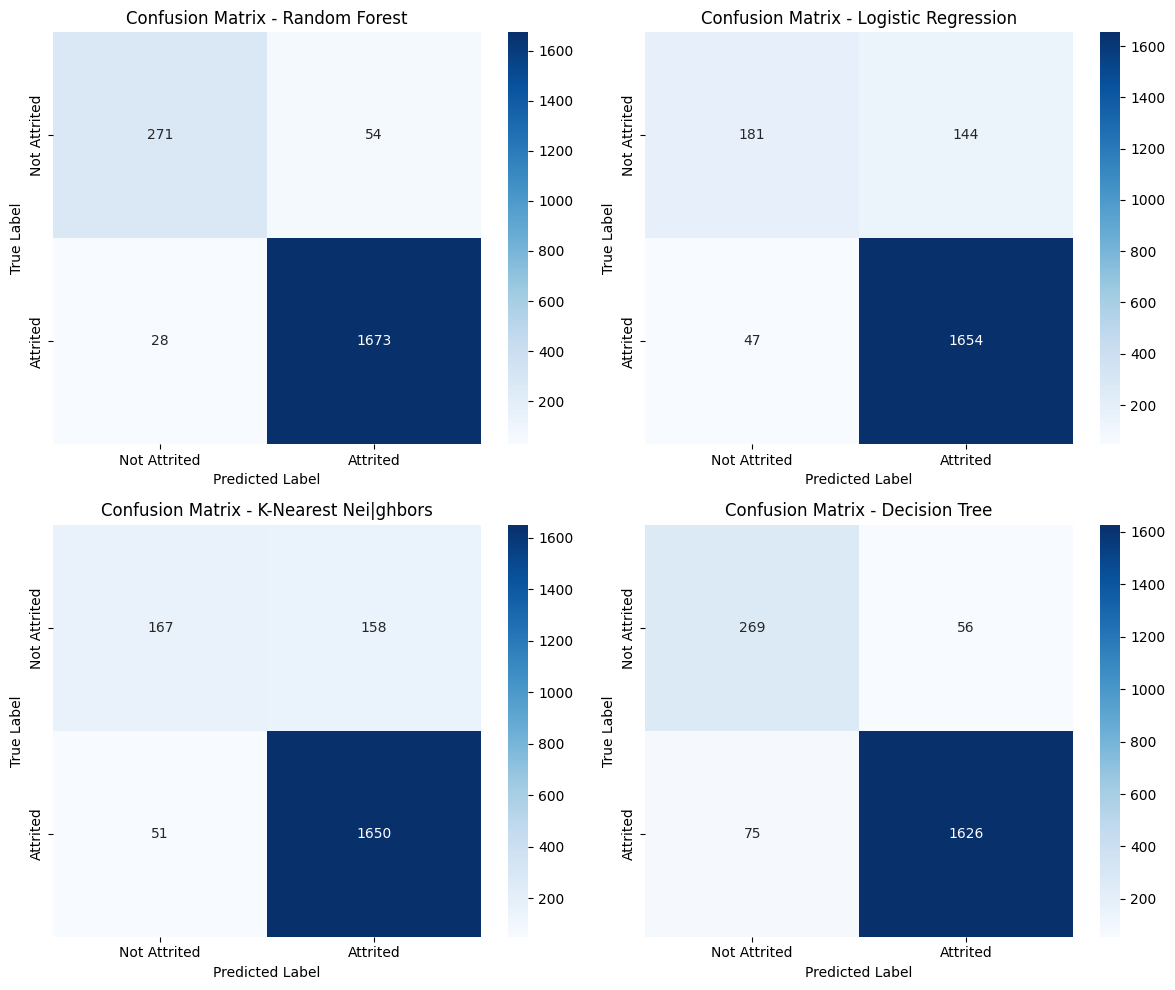

In [38]:
# Visualisasi Confusion Matrix
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for (name, metrics), ax in zip(results.items(), axes.flatten()):
    conf_matrix = metrics["Confusion Matrix"]
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Not Attrited", "Attrited"], yticklabels=["Not Attrited", "Attrited"], ax=ax)
    ax.set_title(f"Confusion Matrix - {name}")
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")

plt.tight_layout()
plt.show()

berdasarkan hasil evaluasi dari keempat model yang digunakan, berikut adalah analisis dan perbandingan kinerjanya:  

1. random forest  
   - memiliki akurasi tertinggi (0.9595) dibandingkan model lainnya.  
   - precision (0.9587), recall (0.9595), dan f1-score (0.9588) menunjukkan performa yang sangat baik.  
   - confusion matrix menunjukkan bahwa model ini memiliki jumlah kesalahan klasifikasi yang paling sedikit.  
   - model ini bekerja sangat baik dalam menangani overfitting dibandingkan dengan decision tree tunggal.  

2. logistic regression  
   - akurasi sebesar 0.9057, lebih rendah dari random forest dan decision tree.  
   - precision (0.8997), recall (0.9057), dan f1-score (0.8988) menunjukkan performa yang cukup baik namun tidak sekuat random forest.  
   - cenderung lebih baik untuk dataset dengan hubungan linear, tetapi mungkin kurang mampu menangani pola kompleks.  

3. k-nearest neighbors (knn)  
   - akurasi terendah (0.8968) di antara keempat model.  
   - precision (0.8891), recall (0.8968), dan f1-score (0.8882) juga paling rendah.  
   - confusion matrix menunjukkan bahwa model ini memiliki tingkat kesalahan yang lebih tinggi dibandingkan model lainnya.  
   - kinerja knn dapat dipengaruhi oleh parameter jumlah tetangga (k) yang dipilih, serta metrik jarak yang digunakan.  

4. decision tree  
   - akurasi 0.9353, lebih baik dari logistic regression dan knn, tetapi lebih rendah dari random forest.  
   - precision (0.9371), recall (0.9353), dan f1-score (0.9361) cukup tinggi.  
   - memiliki performa yang lebih baik daripada knn dan logistic regression dalam menangkap pola kompleks.  
   - rentan terhadap overfitting, tetapi masih menunjukkan hasil yang cukup baik.  



## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

berikut adalah analisis berdasarkan confusion matrix dan evaluasi akurasi sebelumnya untuk keempat model yang digunakan.  

### 1. random forest  
- confusion matrix menunjukkan model ini memiliki jumlah kesalahan klasifikasi paling sedikit dibandingkan model lain.  
- hanya 28 sampel kelas "attrited" yang salah diklasifikasikan sebagai "not attrited," dan hanya 54 sampel "not attrited" yang diklasifikasikan salah.  
- precision dan recall tinggi menunjukkan model ini mampu mengenali kedua kelas dengan baik.  
- model ini memiliki akurasi tertinggi (0.9595), yang menunjukkan keseimbangan antara bias dan varians yang baik.  
- kemungkinan tidak mengalami overfitting karena performanya tetap tinggi pada semua metrik.  

kelemahan:  
- meskipun sangat baik, tetap ada kesalahan prediksi yang dapat diminimalkan lebih lanjut.  

rekomendasi:  
- dapat dicoba tuning hyperparameter lebih lanjut atau menggunakan ensemble learning tambahan untuk meningkatkan generalisasi.  

### 2. logistic regression  
- confusion matrix menunjukkan kesalahan klasifikasi yang lebih besar dibandingkan random forest dan decision tree.  
- 47 sampel "attrited" diklasifikasikan salah sebagai "not attrited," dan 144 sampel "not attrited" salah diklasifikasikan sebagai "attrited."  
- akurasi (0.9057) lebih rendah dibanding random forest dan decision tree.  
- cenderung lebih cocok untuk dataset dengan hubungan linear, yang mungkin bukan karakteristik utama dataset ini.  

kelemahan:  
- precision dan recall lebih rendah dibandingkan random forest dan decision tree, menunjukkan kurang mampu mengenali pola kompleks.  
- lebih banyak kesalahan pada kelas "not attrited," yang berarti model ini kurang sensitif terhadap kelas tersebut.  

rekomendasi:  
- dapat mencoba teknik feature engineering tambahan atau menggunakan model non-linear seperti support vector machine (svm) atau boosting models (xgboost).  

### 3. k-nearest neighbors (knn)  
- confusion matrix menunjukkan tingkat kesalahan yang lebih tinggi dibandingkan model lain.  
- 51 sampel "attrited" salah diklasifikasikan sebagai "not attrited," dan 158 sampel "not attrited" salah diklasifikasikan sebagai "attrited."  
- akurasi (0.8968) adalah yang terendah di antara semua model.  
- model ini lebih sensitif terhadap pemilihan parameter jumlah tetangga (k).  

kelemahan:  
- performa kurang optimal karena knn sangat bergantung pada distribusi data dan tidak bekerja baik pada dataset yang kompleks.  
- recall yang lebih rendah menunjukkan model ini kurang mampu mengenali sampel dari kedua kelas dengan baik.  

rekomendasi:  
- melakukan tuning hyperparameter pada nilai k.  
- menggunakan teknik preprocessing tambahan seperti normalisasi data untuk meningkatkan performa.  
- mempertimbangkan metode lain seperti support vector machine atau neural networks jika data memiliki pola non-linear.  

### 4. decision tree  
- confusion matrix menunjukkan jumlah kesalahan klasifikasi lebih tinggi dibandingkan random forest tetapi lebih baik dibanding logistic regression dan knn.  
- 75 sampel "attrited" salah diklasifikasikan sebagai "not attrited," dan 56 sampel "not attrited" salah diklasifikasikan sebagai "attrited."  
- akurasi (0.9353) lebih baik dibanding logistic regression dan knn tetapi lebih rendah dibanding random forest.  
- model ini rentan terhadap overfitting karena decision tree cenderung mempelajari data secara spesifik.  

kelemahan:  
- overfitting masih menjadi potensi masalah karena decision tree sering mempelajari noise dalam data.  

rekomendasi:  
- menggunakan pruning untuk mengurangi kompleksitas model.  
- mengganti decision tree dengan random forest atau gradient boosting yang lebih stabil dan generalizable.  

### kesimpulan akhir  
- random forest adalah pilihan terbaik dengan keseimbangan akurasi tinggi dan resistansi terhadap overfitting.  
- logistic regression kurang mampu menangkap pola kompleks, tetapi masih dapat digunakan jika interpretabilitas menjadi prioritas.  
- knn memiliki performa paling rendah dan sangat bergantung pada parameter dan distribusi data.  
- decision tree memiliki performa cukup baik tetapi lebih rentan terhadap overfitting dibandingkan random forest.  

### tindakan lanjutan  
- jika ingin meningkatkan performa lebih lanjut, bisa mencoba gradient boosting (xgboost atau lightgbm) yang sering kali lebih baik dalam menangani pola kompleks.  
- melakukan feature engineering tambahan untuk meningkatkan representasi data.  
- menambah jumlah data jika memungkinkan untuk meningkatkan kemampuan generalisasi model.